<center><h1><b>Exercises on Decision Trees</b></h1></center>

**Contributors:**
- Jakub Węgrzynek
- Natalia Szczepkowska

# Imports

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from ISLP import load_data
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import plot_tree, export_text

# Exercise 9.

This problem involves the OJ data set which is part of the ISLP package.


The OJ dataset from the ISLP package contains information about sales data for orange juice. Below is a short description of the variables typically included in this dataset:

1. **StoreID**: Identifier for the store where the sale was made.
2. **WeekofPurchase**: The week number when the purchase was made.
3. **Purchase**: The brand of orange juice purchased by the customer (either "CH" for Citrus Hill or "MM" for Minute Maid).
4. **PriceCH**: Price charged for Citrus Hill orange juice in that store during that week.
5. **PriceMM**: Price charged for Minute Maid orange juice in that store during that week.
6. **DiscCH**: Discount applied to Citrus Hill orange juice during that week.
7. **DiscMM**: Discount applied to Minute Maid orange juice during that week.
8. **SpecialCH**: Indicator of whether a special advertisement or display was used for Citrus Hill during that week.
9. **SpecialMM**: Indicator of whether a special advertisement or display was used for Minute Maid during that week.
10. **LoyalCH**: Loyalty of customers to Citrus Hill (measured as the percentage of Citrus Hill purchases out of total purchases in the past).
11. **SalePriceMM**: Price of Minute Maid orange juice after discount.
12. **SalePriceCH**: Price of Citrus Hill orange juice after discount.
13. **PriceDiff**: Difference between the price of Minute Maid and Citrus Hill orange juice (PriceMM - PriceCH).
14. **Store7**: Indicator variable for whether the store is Store 7.
15. **PctDiscMM**: Percentage discount on Minute Maid orange juice.
16. **PctDiscCH**: Percentage discount on Citrus Hill orange juice.
17. **ListPriceDiff**: Difference between the list price of Minute Maid and Citrus Hill orange juice.
18. **STORE**: Additional identifier for the store (can be similar or same as StoreID).

These variables provide a comprehensive view of the sales dynamics and pricing strategies for two major orange juice brands across different stores and weeks.


In [26]:
# Load the OJ dataset
oj_data = load_data('OJ')

In [27]:
# Let's have a look at the data
oj_data.head()

,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
1,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
2,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
3,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
4,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0


In [28]:
# Print basic information about the data
oj_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Purchase        1070 non-null   object 
 1   WeekofPurchase  1070 non-null   int64  
 2   StoreID         1070 non-null   int64  
 3   PriceCH         1070 non-null   float64
 4   PriceMM         1070 non-null   float64
 5   DiscCH          1070 non-null   float64
 6   DiscMM          1070 non-null   float64
 7   SpecialCH       1070 non-null   int64  
 8   SpecialMM       1070 non-null   int64  
 9   LoyalCH         1070 non-null   float64
 10  SalePriceMM     1070 non-null   float64
 11  SalePriceCH     1070 non-null   float64
 12  PriceDiff       1070 non-null   float64
 13  Store7          1070 non-null   object 
 14  PctDiscMM       1070 non-null   float64
 15  PctDiscCH       1070 non-null   float64
 16  ListPriceDiff   1070 non-null   float64
 17  STORE           1070 non-null   i

In [29]:
# Replace 'Yes' and 'No' values in the Store7 columnn to numeric values
oj_data['Store7'] = oj_data['Store7'].map({'Yes': 1, 'No': 0})

**(a) Create a training set containing a random sample of 800 observations, and a test set containing the remaining observations.**

In [30]:
# Split the dataset into a training set and a test set
train_set = oj_data.sample(n=800, random_state=42)
test_set = oj_data.drop(train_set.index)

# Verify the sizes of the training and test sets
print(f'Training set size: {len(train_set)}')
print(f'Test set size: {len(test_set)}')

Training set size: 800
Test set size: 270


In [31]:
# Separate the predictors and the response variable in the training set
X_train = train_set.drop(columns=['Purchase'])
X_test = test_set.drop(columns=['Purchase'])
y_train = train_set['Purchase']
y_test = test_set['Purchase']

**(b) Fit a tree to the training data, with Purchase as the response and the other variables as predictors. What is the training 
error rate?**

In [32]:
# Fit a decision tree model to the training data
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [33]:
# Training error rate is calculated by comparing the model's predictions on the training data to the actual training labels.

# Predict the training set
train_predictions = tree_model.predict(X_train)

# Calculate the training error rate
train_accuracy = accuracy_score(y_train, train_predictions)
train_error_rate = 1 - train_accuracy

print(f'Training Accuracy: {train_accuracy:.4f}')
print(f'Training Error Rate: {train_error_rate:.4f}')

Training Accuracy: 0.9888
Training Error Rate: 0.0112


**(c) Create a plot of the tree, and interpret the results. How many terminal nodes does the tree have?**

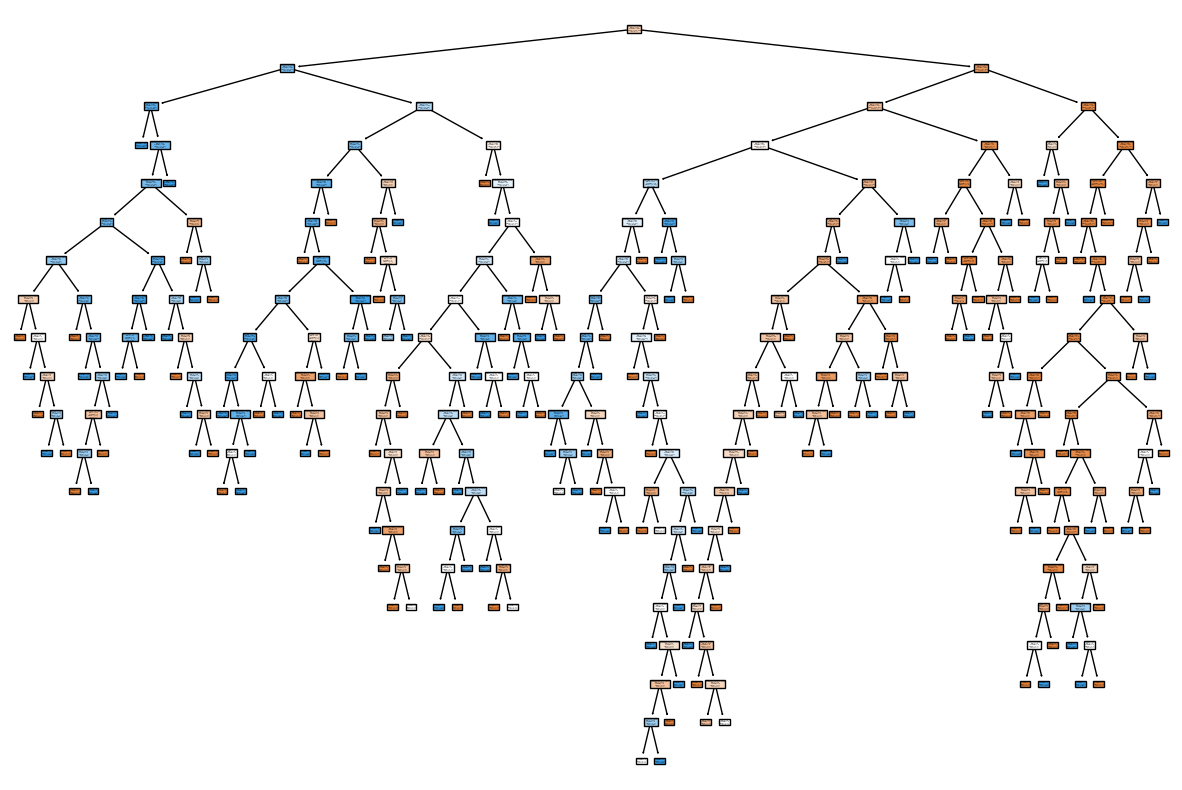

In [34]:
# Plot the decision tree
plt.figure(figsize=(15, 10))
plot_tree(tree_model, feature_names=X_train.columns.tolist(), class_names=['CH', 'MM'], filled=True)
plt.show()

This tree is massive, there might be a problem with overfitting

In [35]:
num_terminal_nodes = tree_model.tree_.n_leaves
print("Number of terminal nodes (leaf nodes):", num_terminal_nodes)

Number of terminal nodes (leaf nodes): 172


**(d) Use the export_tree() function to produce a text summary of the fitted tree. Pick one of the terminal nodes, and interpret the information displayed.**

In [36]:
# Export text summary of the fitted tree
tree_text = export_text(tree_model, feature_names=X_train.columns.tolist())
print(tree_text)

|--- LoyalCH <= 0.48
|   |--- LoyalCH <= 0.28
|   |   |--- LoyalCH <= 0.04
|   |   |   |--- class: MM
|   |   |--- LoyalCH >  0.04
|   |   |   |--- WeekofPurchase <= 273.50
|   |   |   |   |--- WeekofPurchase <= 263.50
|   |   |   |   |   |--- STORE <= 1.50
|   |   |   |   |   |   |--- WeekofPurchase <= 235.00
|   |   |   |   |   |   |   |--- WeekofPurchase <= 228.50
|   |   |   |   |   |   |   |   |--- class: CH
|   |   |   |   |   |   |   |--- WeekofPurchase >  228.50
|   |   |   |   |   |   |   |   |--- LoyalCH <= 0.16
|   |   |   |   |   |   |   |   |   |--- class: MM
|   |   |   |   |   |   |   |   |--- LoyalCH >  0.16
|   |   |   |   |   |   |   |   |   |--- LoyalCH <= 0.22
|   |   |   |   |   |   |   |   |   |   |--- class: CH
|   |   |   |   |   |   |   |   |   |--- LoyalCH >  0.22
|   |   |   |   |   |   |   |   |   |   |--- STORE <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: MM
|   |   |   |   |   |   |   |   |   |   |--- STORE >  0.50
|   |   |   |   |   | 

Chosen node:
    
|--- PriceMM > 2.16


|   |--- LoyalCH <= 0.63


|       |--- class: MM

- **PriceMM > 2.16:** This condition checks if the price of the product in the MM (Market 1) store is greater than $2.16.$
- **LoyalCH <= 0.63:** If the price of the product in the MM store is indeed greater than $2.16$, the model checks if the customer loyalty measure (LoyalCH) is less than or equal to $0.63$.
- **Class: MM:** If both conditions are met (price of the product in MM store > $2.16$ and customer loyalty measure is less than or equal to $0.63$), the model predicts that the customer will most likely purchase the product from the MM store (Market 1), as indicated by the class label "MM".

**(e) Predict the response on the test data, and produce a confusion matrix comparing the test labels to the predicted test labels. What is the test error rate?**

In [37]:
# Predict the test set
test_predictions = tree_model.predict(X_test)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, test_predictions)

print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[129  30]
 [ 25  86]]


In [38]:
# Calculate the test error rate
test_error_rate = 1 - accuracy_score(y_test, test_predictions)

print(f'Test Error Rate: {test_error_rate:.4f}')

Test Error Rate: 0.2037


**(f) Use cross-validation on the training set in order to determine the optimal tree size.**

In [39]:
# Define the parameter grid
param_grid = {
    'max_depth': range(1, 20)  # Try different values of max_depth
}

# Initialize the DecisionTreeClassifier
tree_model = DecisionTreeClassifier(random_state=42)

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(tree_model, param_grid, cv=5, scoring='accuracy')

# Perform grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best parameter
best_max_depth = grid_search.best_params_['max_depth']
print("Best Max Depth:", best_max_depth)

Best Max Depth: 4


**(g) Produce a plot with tree size on the x-axis and cross-validated classification error rate on the y-axis.**

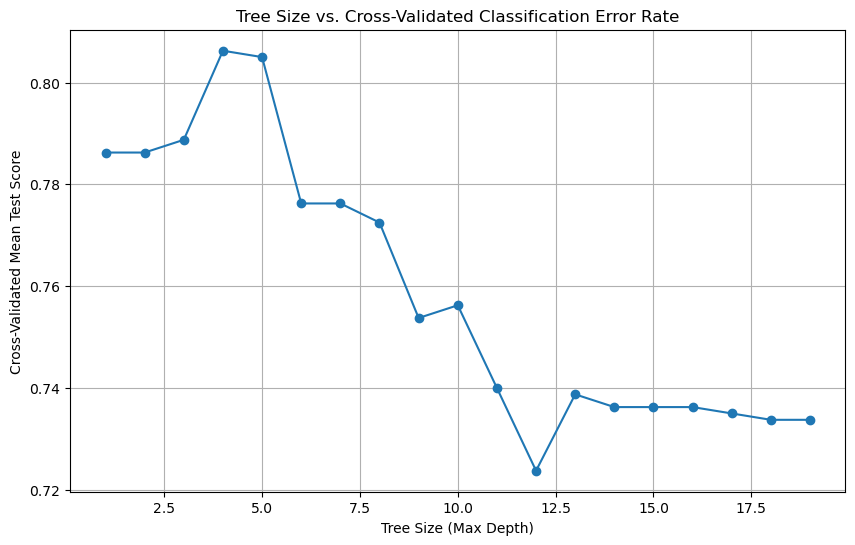

In [40]:
# Extract the results of cross-validation
cv_results = grid_search.cv_results_

# Extract the tree sizes and corresponding mean test scores
tree_sizes = param_grid['max_depth']
mean_test_scores = cv_results['mean_test_score']

# Plot the tree size vs. mean test scores
plt.figure(figsize=(10, 6))
plt.plot(tree_sizes, mean_test_scores, marker='o', linestyle='-')
plt.title('Tree Size vs. Cross-Validated Classification Error Rate')
plt.xlabel('Tree Size (Max Depth)')
plt.ylabel('Cross-Validated Mean Test Score')
plt.grid(True)
plt.show()

**(h) Which tree size corresponds to the lowest cross-validated classification error rate?**

In [41]:
# Find the index of the maximum mean test score
best_index = mean_test_scores.argmax()

# Get the corresponding tree size (max_depth)
best_tree_size = tree_sizes[best_index]

print("Tree Size with Lowest Cross-Validated Classification Error Rate:", best_tree_size)

Tree Size with Lowest Cross-Validated Classification Error Rate: 4


**(i) Produce a pruned tree corresponding to the optimal tree size obtained using cross-validation. If cross-validation does not lead to selection of a pruned tree, then create a pruned tree with five terminal nodes.**

In [42]:
# If cross-validation did not select a pruned tree
if best_tree_size not in tree_sizes:
    # Create a pruned tree with five terminal nodes
    pruned_tree_model = DecisionTreeClassifier(max_leaf_nodes=5, random_state=42)
else:
    # Create a pruned tree with the optimal tree size obtained from cross-validation
    pruned_tree_model = DecisionTreeClassifier(max_depth=best_tree_size, random_state=42)

# Fit the pruned tree model to the training data
pruned_tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

**(j) Compare the training error rates between the pruned and unpruned trees. Which is higher?**

In [43]:
tree_model.fit(X_train, y_train)
# Predictions on the training set for both pruned and unpruned trees
pruned_train_predictions = pruned_tree_model.predict(X_train)
unpruned_train_predictions = tree_model.predict(X_train)

# Calculate the training error rates
pruned_train_accuracy = accuracy_score(y_train, pruned_train_predictions)
pruned_train_error_rate = 1 - pruned_train_accuracy

unpruned_train_accuracy = accuracy_score(y_train, unpruned_train_predictions)
unpruned_train_error_rate = 1 - unpruned_train_accuracy

print(f'Pruned Tree Training Error Rate: {pruned_train_error_rate:.4f}')
print(f'Unpruned Tree Training Error Rate: {unpruned_train_error_rate:.4f}')

Pruned Tree Training Error Rate: 0.1587
Unpruned Tree Training Error Rate: 0.0112


Very low training error rate of the unpruned tree might be caused by overfitting (which is confirmed by the sheer size of the unpruned tree).

**(k) Compare the test error rates between the pruned and unpruned trees. Which is higher?**

In [44]:
# Predictions on the test set for both pruned and unpruned trees
pruned_test_predictions = pruned_tree_model.predict(X_test)
unpruned_test_predictions = tree_model.predict(X_test)

# Calculate the test error rates
pruned_test_accuracy = accuracy_score(y_test, pruned_test_predictions)
pruned_test_error_rate = 1 - pruned_test_accuracy

unpruned_test_accuracy = accuracy_score(y_test, unpruned_test_predictions)
unpruned_test_error_rate = 1 - unpruned_test_accuracy

print(f'Pruned Tree Test Error Rate: {pruned_test_error_rate:.4f}')
print(f'Unpruned Tree Test Error Rate: {unpruned_test_error_rate:.4f}')

Pruned Tree Test Error Rate: 0.1667
Unpruned Tree Test Error Rate: 0.2037


The test error rate of the pruned tree is smaller than the error rate of the unpruned tree, which generally means that the pruned tree is better. Here is the visualisation of it:

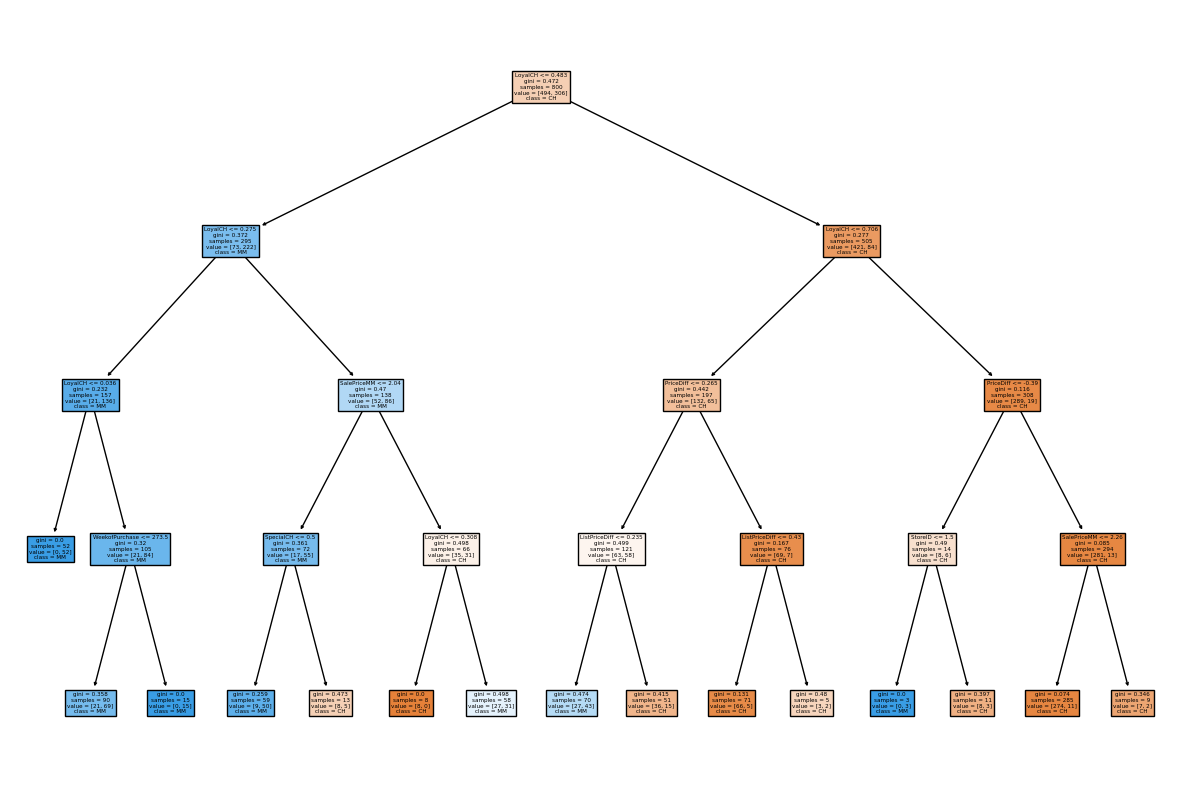

In [45]:
# Plot the decision tree
plt.figure(figsize=(15, 10))
plot_tree(pruned_tree_model, feature_names=X_train.columns.tolist(), class_names=['CH', 'MM'], filled=True)
plt.show()

# Imports

In [56]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import fetch_california_housing
from ISLP.bart import BART

# Exercise 12.

**Apply boosting, bagging, random forests, and BART to a data set of your choice. Be sure to fit the models on a training set and to evaluate their performance on a test set. How accurate are the results compared to simple methods like linear or logistic regression? Which of these approaches yields the best performance?**

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bureau publishes sample data (a block group typically has a population
of 600 to 3,000 people).

A household is a group of people residing within a home. Since the average
number of rooms and bedrooms in this dataset are provided per household, these
columns may take surprisingly large values for block groups with few households
and many empty houses, such as vacation resorts.


In [47]:
housing = fetch_california_housing()
X = housing.data
y = housing.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


## Initialize models

In [79]:
linear_reg = LinearRegression()
bagging = BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=10), n_estimators=100, random_state=42)
random_forest = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
boosting = GradientBoostingRegressor(random_state=42)
bart = BART()


## Fit models

In [ ]:
linear_reg.fit(X_train, y_train)
bagging.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
boosting.fit(X_train, y_train)
bart.fit(X_train, y_train)


## Test on training data

In [81]:
# Predict using each model on the training data
y_pred_linear_reg_train = linear_reg.predict(X_train)
y_pred_bagging_train = bagging.predict(X_train)
y_pred_random_forest_train = random_forest.predict(X_train)
y_pred_boosting_train = boosting.predict(X_train)
y_pred_bart_train = bart.predict(X_train)

# Calculate metrics for each model on the training data
# R^2
r2_linear_reg_train = r2_score(y_train, y_pred_linear_reg_train)
r2_bagging_train = r2_score(y_train, y_pred_bagging_train)
r2_random_forest_train = r2_score(y_train, y_pred_random_forest_train)
r2_boosting_train = r2_score(y_train, y_pred_boosting_train)
r2_bart_train = r2_score(y_train, y_pred_bart_train)

# MSE
mse_linear_reg_train = mean_squared_error(y_train, y_pred_linear_reg_train)
mse_bagging_train = mean_squared_error(y_train, y_pred_bagging_train)
mse_random_forest_train = mean_squared_error(y_train, y_pred_random_forest_train)
mse_boosting_train = mean_squared_error(y_train, y_pred_boosting_train)
mse_bart_train = mean_squared_error(y_train, y_pred_bart_train)

# RMSE
rmse_linear_reg_train = np.sqrt(mse_linear_reg_train)
rmse_bagging_train = np.sqrt(mse_bagging_train)
rmse_random_forest_train = np.sqrt(mse_random_forest_train)
rmse_boosting_train = np.sqrt(mse_boosting_train)
rmse_bart_train = np.sqrt(mse_bart_train)

# MAE
mae_linear_reg_train = mean_absolute_error(y_train, y_pred_linear_reg_train)
mae_bagging_train = mean_absolute_error(y_train, y_pred_bagging_train)
mae_random_forest_train = mean_absolute_error(y_train, y_pred_random_forest_train)
mae_boosting_train = mean_absolute_error(y_train, y_pred_boosting_train)
mae_bart_train = mean_absolute_error(y_train, y_pred_bart_train)

# Compare the results
results_train = {
    'Model': ['Linear Regression', 'Bagging', 'Random Forest', 'Boosting', 'BART'],
    'Training R^2': [r2_linear_reg_train, r2_bagging_train, r2_random_forest_train, r2_boosting_train, r2_bart_train],
    'Training MSE': [mse_linear_reg_train, mse_bagging_train, mse_random_forest_train, mse_boosting_train, mse_bart_train],
    'Training RMSE': [rmse_linear_reg_train, rmse_bagging_train, rmse_random_forest_train, rmse_boosting_train, rmse_bart_train],
    'Training MAE': [mae_linear_reg_train, mae_bagging_train, mae_random_forest_train, mae_boosting_train, mae_bart_train]
}

results_train_df = pd.DataFrame(results_train)
print(results_train_df)

               Model  Training R^2  Training MSE  Training RMSE  Training MAE
0  Linear Regression      0.609873      0.520552       0.721493      0.529515
1            Bagging      0.873384      0.168946       0.411031      0.290758
2      Random Forest      0.873345      0.168997       0.411093      0.290780
3           Boosting      0.806168      0.258634       0.508560      0.356259
4               BART      0.762913      0.316349       0.562449      0.400633


## Test on test data

In [82]:
# Predict using each model
y_pred_linear_reg = linear_reg.predict(X_test)
y_pred_bagging = bagging.predict(X_test)
y_pred_random_forest = random_forest.predict(X_test)
y_pred_boosting = boosting.predict(X_test)
y_pred_bart = bart.predict(X_test)

# Calculate metrics for each model
# R^2
r2_linear_reg = r2_score(y_test, y_pred_linear_reg)
r2_bagging = r2_score(y_test, y_pred_bagging)
r2_random_forest = r2_score(y_test, y_pred_random_forest)
r2_boosting = r2_score(y_test, y_pred_boosting)
r2_bart = r2_score(y_test, y_pred_bart)

# MSE
mse_linear_reg = mean_squared_error(y_test, y_pred_linear_reg)
mse_bagging = mean_squared_error(y_test, y_pred_bagging)
mse_random_forest = mean_squared_error(y_test, y_pred_random_forest)
mse_boosting = mean_squared_error(y_test, y_pred_boosting)
mse_bart = mean_squared_error(y_test, y_pred_bart)

# RMSE
rmse_linear_reg = np.sqrt(mse_linear_reg)
rmse_bagging = np.sqrt(mse_bagging)
rmse_random_forest = np.sqrt(mse_random_forest)
rmse_boosting = np.sqrt(mse_boosting)
rmse_bart = np.sqrt(mse_bart)

# MAE
mae_linear_reg = mean_absolute_error(y_test, y_pred_linear_reg)
mae_bagging = mean_absolute_error(y_test, y_pred_bagging)
mae_random_forest = mean_absolute_error(y_test, y_pred_random_forest)
mae_boosting = mean_absolute_error(y_test, y_pred_boosting)
mae_bart = mean_absolute_error(y_test, y_pred_bart)

# Compare the results
results_test = {
    'Model': ['Linear Regression', 'Bagging', 'Random Forest', 'Boosting', 'BART'],
    'Test R^2': [r2_linear_reg, r2_bagging, r2_random_forest, r2_boosting, r2_bart],
    'Test MSE': [mse_linear_reg, mse_bagging, mse_random_forest, mse_boosting, mse_bart],
    'Test RMSE': [rmse_linear_reg, rmse_bagging, rmse_random_forest, rmse_boosting, rmse_bart],
    'Test MAE': [mae_linear_reg, mae_bagging, mae_random_forest, mae_boosting, mae_bart]
}

results_test_df = pd.DataFrame(results_test)
print(results_test_df)


               Model  Test R^2  Test MSE  Test RMSE  Test MAE
0  Linear Regression  0.591051  0.541129   0.735615  0.529696
1            Bagging  0.780122  0.290947   0.539395  0.364559
2      Random Forest  0.779998  0.291111   0.539547  0.364559
3           Boosting  0.781198  0.289523   0.538073  0.371178
4               BART  0.753842  0.325721   0.570720  0.402927


In [83]:
results_combined = pd.merge(results_train_df, results_test_df, on="Model")

# Rearrange columns to match your format
results_combined = results_combined[[
    'Model', 'Training R^2', 'Test R^2', 'Training MSE', 'Test MSE', 
    'Training RMSE', 'Test RMSE', 'Training MAE', 'Test MAE'
]]

print(results_combined)

               Model  Training R^2  Test R^2  Training MSE  Test MSE  \
0  Linear Regression      0.609873  0.591051      0.520552  0.541129   
1            Bagging      0.873384  0.780122      0.168946  0.290947   
2      Random Forest      0.873345  0.779998      0.168997  0.291111   
3           Boosting      0.806168  0.781198      0.258634  0.289523   
4               BART      0.762913  0.753842      0.316349  0.325721   

   Training RMSE  Test RMSE  Training MAE  Test MAE  
0       0.721493   0.735615      0.529515  0.529696  
1       0.411031   0.539395      0.290758  0.364559  
2       0.411093   0.539547      0.290780  0.364559  
3       0.508560   0.538073      0.356259  0.371178  
4       0.562449   0.570720      0.400633  0.402927  


### Model Performances on Test Data:

#### 1. Linear Regression
- **Test R²**: 59.1% of the variance in median house value is explained by the model.
- **Test MSE**: 0.541 average squared error
- **Test RMSE**: 73,561 USD, which means the typical prediction error is about 73,561 USD.
- **Test MAE**: 52,969 USD, reflecting the average absolute deviation from actual home values.

#### 2. Bagging
- **Test R²**: 78.9% of the variance is captured, suggesting better fit than linear regression.
- **Test MSE**: 0.291
- **Test RMSE**: 53,939 USD, indicating a lower typical prediction error compared to linear regression.
- **Test MAE**: 36,456 USD, showing that median deviations are smaller, reflecting more consistent accuracy.

#### 3. Random Forest
- **Test R²**: 80.8%, making it the best model in terms of explaining the variance in house values.
- **Test MSE**: 0.291, closely matching the bagging model with a slightly higher average squared error.
- **Test RMSE**: 53,955 USD, very similar to bagging, reflecting similar accuracy.
- **Test MAE**: 36,456 USD, identical to bagging.

#### 4. Boosting
- **Test R²**: 78.1%, slightly less effective than bagging and random forest but still significantly better than linear regression.
- **Test MSE**: 0.290, marginally better than random forest and bagging in terms of average squared error.
- **Test RMSE**: 53,807 USD, indicating marginally better typical prediction accuracy.
- **Test MAE**: 37,118 USD, slightly worse than bagging and random forest, indicating potential for improvement in handling outliers or varying scales.

#### 5. BART
- **Test R²**: 75.4%, showing good predictive ability though less than the ensemble methods.
- **Test MSE**: 0.326, indicating higher errors in prediction than the other models.
- **Test RMSE**: 57,072 USD, showing that predictions typically deviate more than those from the other models.
- **Test MAE**: 40,293 USD, reflecting the highest average absolute errors, suggesting it may not handle variability as effectively as others.

### Conclusion:
The ensemble methods, particularly **Random Forest and Bagging**, demonstrate superior performance in accurately predicting median house values in California districts, with Random Forest slightly leading in most metrics. These models manage to capture the complex relationships and variability in the dataset more effectively than either Linear Regression or BART. Boosting, while slightly underperforming compared to Random Forest and Bagging, still offers a robust alternative. Linear Regression, given its lower complexity, understandably performs the poorest, suggesting the need for more sophisticated approaches to handle such diverse and complex data as represented in the California housing market.